In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist, ngrams
try:
  from wordcloud import WordCloud
  from textblob import TextBlob
except:
  !pip install textblob wordcloud -q
  from wordcloud import WordCloud
  from textblob import TextBlob
import re


nltk.download('punkt_tab', quiet = True)
nltk.download('stopwords', quiet = True)
stop_words = set(stopwords.words('english'))

In [ ]:
import pandas as pd
import re

df = pd.read_csv("/content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv")
print(df.head())

   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [ ]:
missing_count = df['instruction'].isnull().sum()
print(missing_count)

0


In [ ]:
df['original_instruction'] = df['instruction']

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    #words = text.split()
    #words = [w for w in words if w not in stop_words]
    #text = ' '.join(words)

    text = text.lower()
    text = re.sub(r'\{\{.*?\}\}', '', text)  # Removes content between {{ }}
    text = re.sub(r'[^\w\s]', '', text)      # Removes non-alphanumeric chars
    text = text.strip()                      # Removes leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)         # Replaces multiple spaces with single space
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['cleaned_instructions'] = df['instruction'].apply(clean_text)

In [ ]:
df[['cleaned_instructions', 'instruction']].head()

,cleaned_instructions,instruction
0,question about cancelling order,question about cancelling order {{Order Number}}
1,i have a question about cancelling oorder,i have a question about cancelling oorder {{Or...
2,i need help cancelling puchase,i need help cancelling puchase {{Order Number}}
3,i need to cancel purchase,I need to cancel purchase {{Order Number}}
4,i cannot afford this order cancel purchase,"I cannot afford this order, cancel purchase {{..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   flags                 26872 non-null  object
 1   instruction           26872 non-null  object
 2   category              26872 non-null  object
 3   intent                26872 non-null  object
 4   response              26872 non-null  object
 5   original_instruction  26872 non-null  object
 6   cleaned_instructions  26872 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


# Basic Text Statistics

In [ ]:
df['char_length'] = df['cleaned_instructions'].apply(len)

df['word_count'] = df['cleaned_instructions'].apply(lambda x: len(x.split()))

In [ ]:
df[['char_length', 'word_count']].describe()

,char_length,word_count
count,26872.000000,26872.000000
mean,41.863799,8.175424
std,11.804896,2.801079
min,6.000000,1.000000
25%,34.000000,6.000000
50%,43.000000,8.000000
75%,51.000000,10.000000
max,60.000000,16.000000


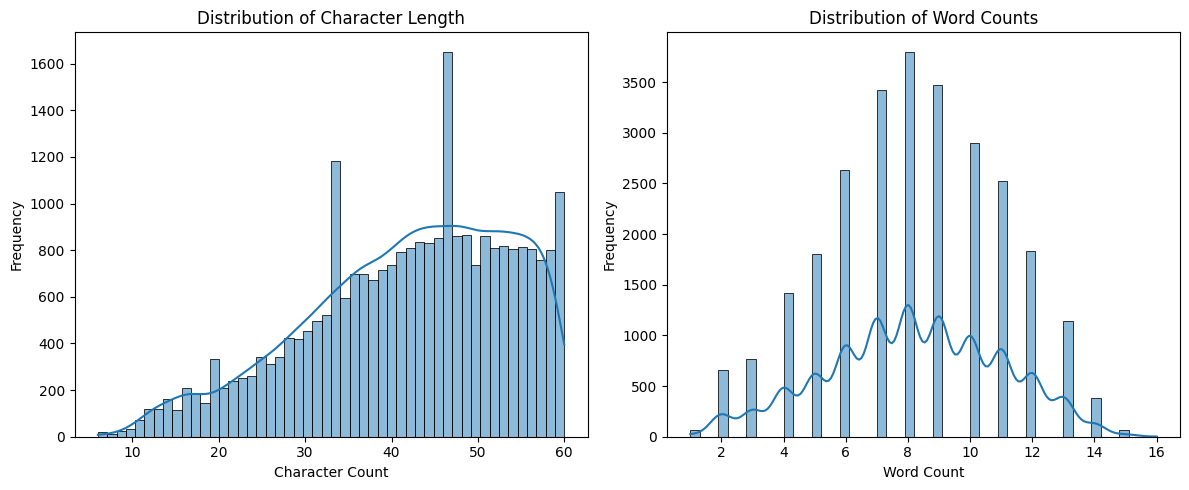

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['char_length'], bins=50, kde=True)
plt.title('Distribution of Character Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Text Content Analysis

In [ ]:
df['tokens'] = df['cleaned_instructions'].apply(lambda x: word_tokenize(str(x)) if pd.notna(x) else [])

In [ ]:
df['tokens_no_stop'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words])

In [ ]:
all_tokens_no_stop = [token for sublist in df['tokens_no_stop'] for token in sublist]

In [ ]:
freq_dist = FreqDist(all_tokens_no_stop)
freq_dist.most_common(30)

[('help', 6319),
 ('need', 4059),
 ('account', 3567),
 ('want', 3110),
 ('assistance', 3005),
 ('know', 2691),
 ('see', 2545),
 ('check', 2070),
 ('address', 1949),
 ('order', 1926),
 ('payment', 1609),
 ('purchase', 1603),
 ('dont', 1462),
 ('customer', 1229),
 ('delivery', 1075),
 ('shipping', 1028),
 ('ur', 946),
 ('newsletter', 940),
 ('could', 921),
 ('status', 819),
 ('bill', 770),
 ('get', 767),
 ('cancel', 712),
 ('money', 709),
 ('invoice', 705),
 ('company', 659),
 ('got', 653),
 ('signup', 649),
 ('methods', 633),
 ('product', 623)]

<ipython-input-23-48b84918d1c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette='viridis')


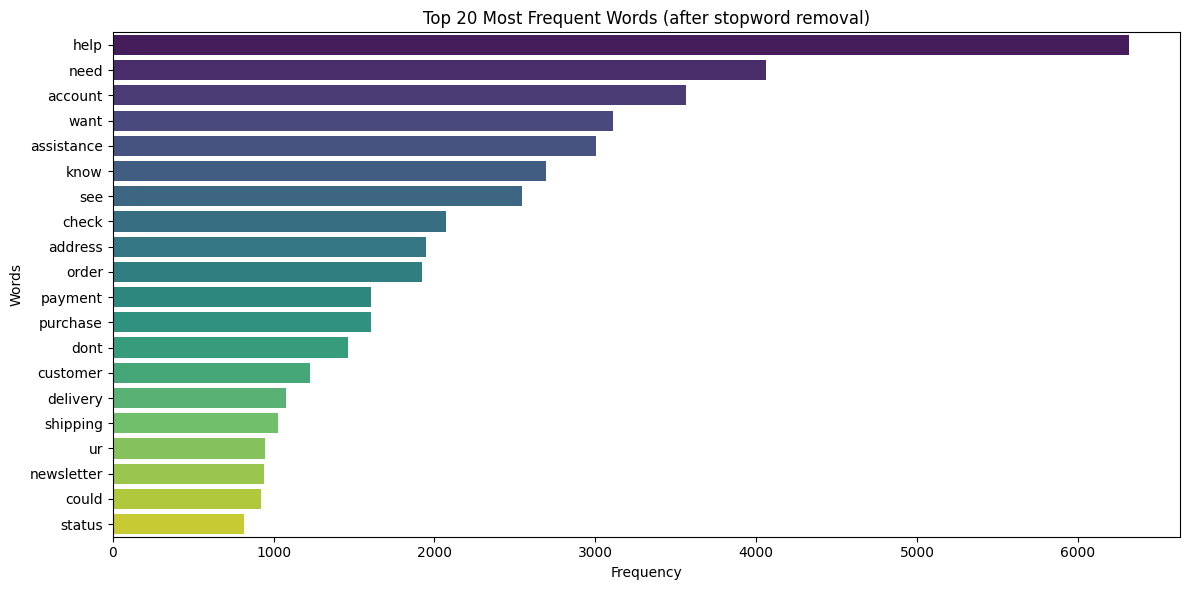

In [ ]:
num_top_words = 20
top_words = freq_dist.most_common(num_top_words)
words, frequencies = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')
plt.title(f'Top {num_top_words} Most Frequent Words (after stopword removal)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

In [ ]:
# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens_no_stop))

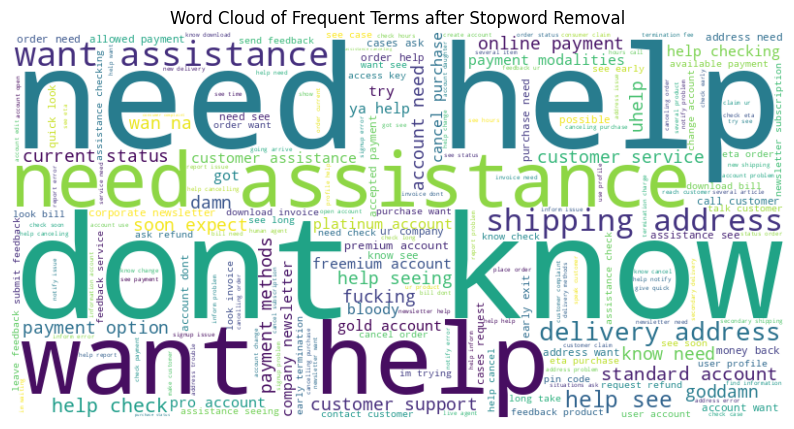

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms after Stopword Removal')
plt.show()

# Intent/Category Analysis

In [ ]:
len(df['intent'].value_counts())

27

<ipython-input-27-15d0be9f61bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='intent', data=df, order=df['intent'].value_counts().iloc[:num_top_intents].index, palette='viridis')


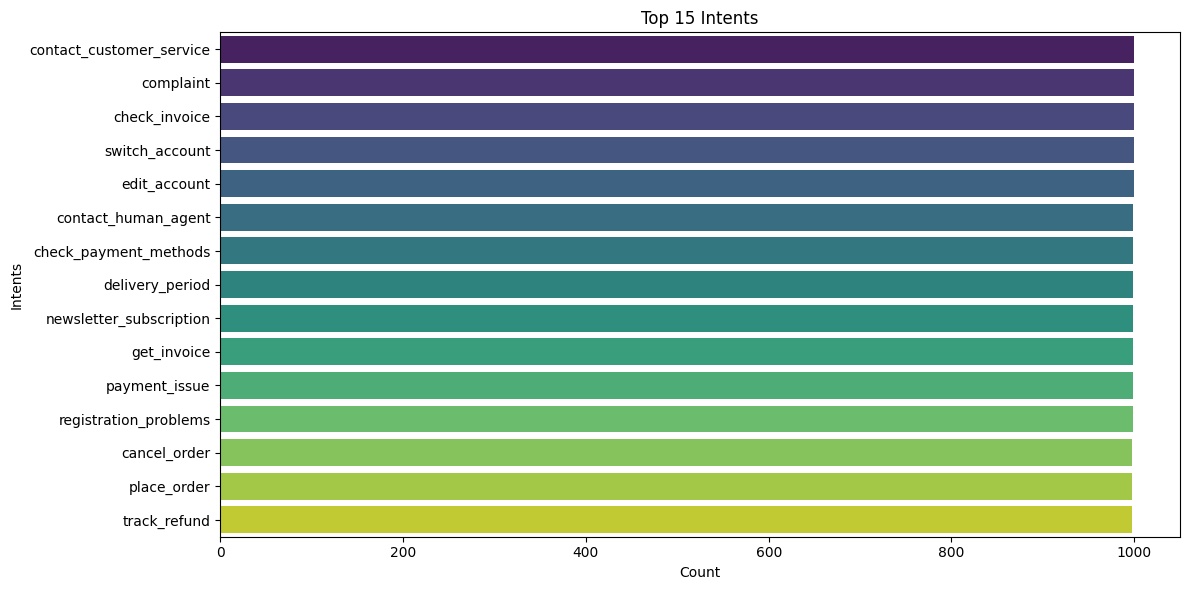

In [ ]:
# intent distribution
num_top_intents = 15
top_intents = df['intent'].value_counts().head(num_top_intents)

plt.figure(figsize=(12, 6))
sns.countplot(y='intent', data=df, order=df['intent'].value_counts().iloc[:num_top_intents].index, palette='viridis')
plt.title(f'Top {num_top_intents} Intents')
plt.xlabel('Count')
plt.ylabel('Intents')
plt.tight_layout()
plt.show()

<ipython-input-28-8cce1e4ad119>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='magma')


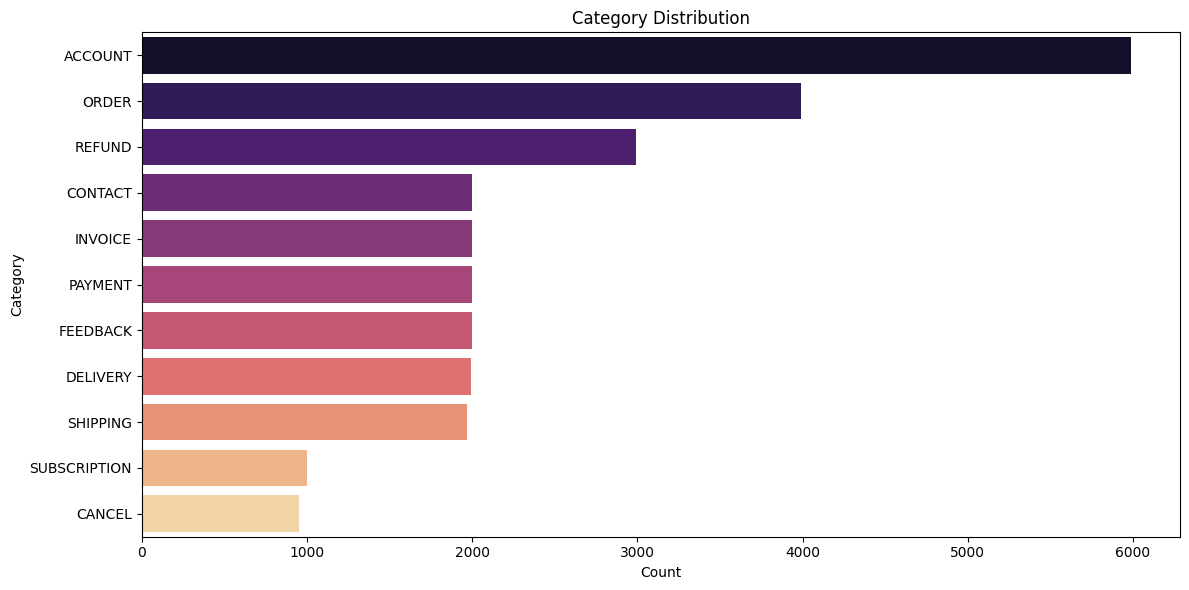

In [ ]:
#Category distribution
df['category'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='magma')
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# N-gram Analysis (Bi-grams)

In [ ]:
n = 2
all_bigrams = list(ngrams(all_tokens_no_stop, n))

freq_dist_bigrams = FreqDist(all_bigrams)
freq_dist_bigrams.most_common(30)

[(('dont', 'know'), 1362),
 (('need', 'help'), 1355),
 (('want', 'help'), 1201),
 (('need', 'assistance'), 1089),
 (('want', 'assistance'), 998),
 (('shipping', 'address'), 759),
 (('delivery', 'address'), 725),
 (('help', 'see'), 537),
 (('help', 'check'), 412),
 (('standard', 'account'), 379),
 (('customer', 'support'), 366),
 (('help', 'seeing'), 353),
 (('wan', 'na'), 346),
 (('soon', 'expect'), 346),
 (('know', 'need'), 338),
 (('current', 'status'), 334),
 (('payment', 'options'), 330),
 (('customer', 'service'), 326),
 (('payment', 'methods'), 324),
 (('account', 'need'), 303),
 (('payment', 'modalities'), 271),
 (('help', 'checking'), 265),
 (('ya', 'help'), 262),
 (('pro', 'account'), 262),
 (('company', 'newsletter'), 247),
 (('could', 'help'), 242),
 (('freemium', 'account'), 240),
 (('customer', 'assistance'), 237),
 (('platinum', 'account'), 235),
 (('cancel', 'purchase'), 233)]

In [ ]:
num_top_bigrams = 20
top_bigrams = freq_dist_bigrams.most_common(num_top_bigrams)

# format bigrams for plotting
bigram_labels = [' '.join(bigram) for bigram, freq in top_bigrams]
bigram_frequencies = [freq for bigram, freq in top_bigrams]


<ipython-input-31-815a7b66f8ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_frequencies, y=bigram_labels, palette='viridis')


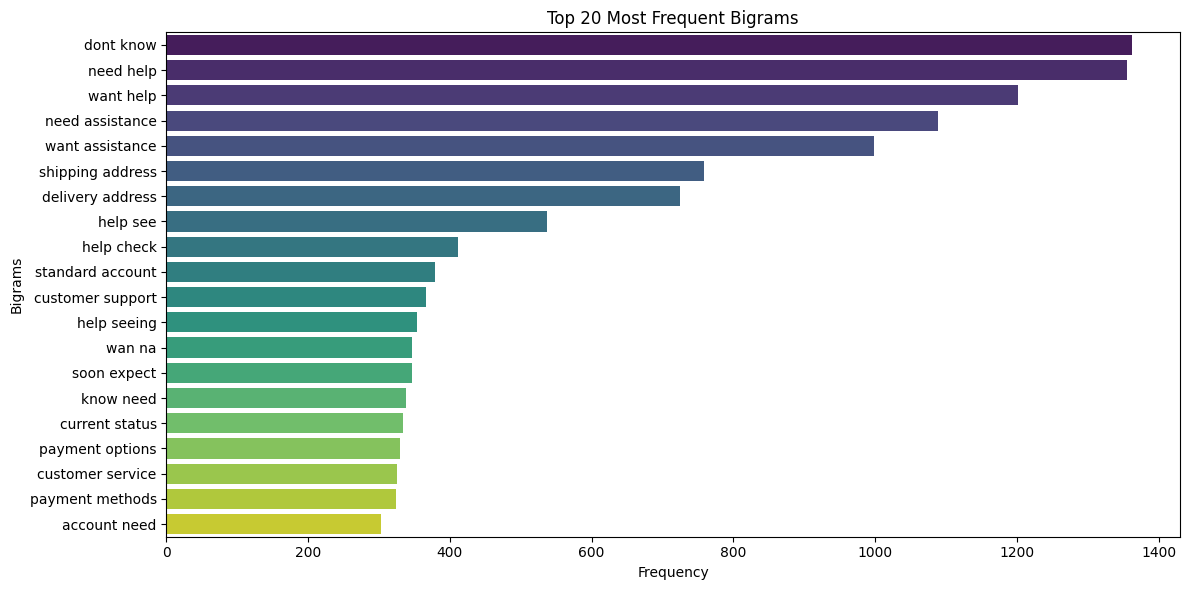

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_frequencies, y=bigram_labels, palette='viridis')
plt.title(f'Top {num_top_bigrams} Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.tight_layout()
plt.show()

# Initial Feature Engineering

In [ ]:
def get_sentiment(text):
  return TextBlob(str(text)).sentiment.polarity

In [ ]:
df['sentiment_polarity'] = df['cleaned_instructions'].apply(get_sentiment)
df['sentiment_polarity'].describe()

,sentiment_polarity
count,26872.000000
mean,-0.010062
std,0.129304
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.800000


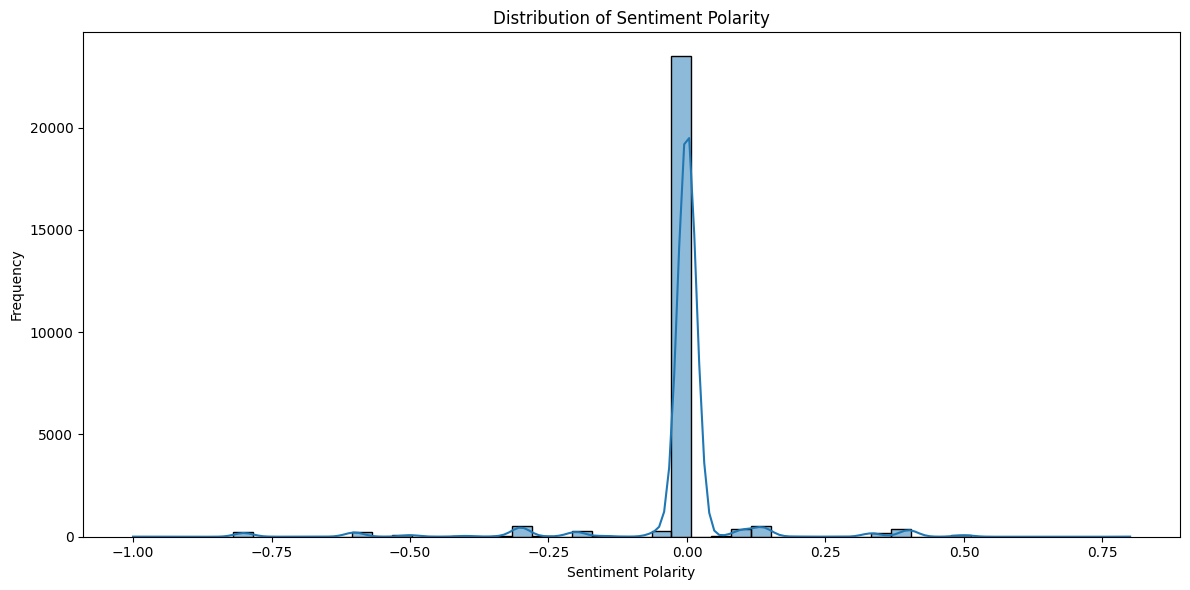

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_polarity'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df[['cleaned_instructions', 'char_length', 'word_count', 'sentiment_polarity']].head()

,cleaned_instructions,char_length,word_count,sentiment_polarity
0,question about cancelling order,31,4,0.0
1,i have a question about cancelling oorder,41,7,0.0
2,i need help cancelling puchase,30,5,0.0
3,i need to cancel purchase,25,5,0.0
4,i cannot afford this order cancel purchase,42,7,0.0


# Prompt Formatting (Alpaca Style)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flags                 26872 non-null  object 
 1   instruction           26872 non-null  object 
 2   category              26872 non-null  object 
 3   intent                26872 non-null  object 
 4   response              26872 non-null  object 
 5   original_instruction  26872 non-null  object 
 6   cleaned_instructions  26872 non-null  object 
 7   char_length           26872 non-null  int64  
 8   word_count            26872 non-null  int64  
 9   tokens                26872 non-null  object 
 10  tokens_no_stop        26872 non-null  object 
 11  sentiment_polarity    26872 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.5+ MB


In [ ]:
def format_alpaca_prompt(example):
  instruction = example.get('instruction' ,'')
  response = example.get('response', '')

  if instruction and response:
    return {
        "text": f"<start_of_turn>user\n{instruction}<end_of_turn>\n<start_of_turn>model\n{response}<end_of_turn>"
    }
  else:
    return {"text": ""}


In [ ]:
df_formatted = df.apply(format_alpaca_prompt, axis=1) # Apply the function row-wise (axis=1)
df_formatted = df_formatted.apply(pd.Series) # Convert the dictionary results to Series

In [ ]:
df_formatted.head()

,text
0,<start_of_turn>user\nquestion about cancelling...
1,<start_of_turn>user\ni have a question about c...
2,<start_of_turn>user\ni need help cancelling pu...
3,<start_of_turn>user\nI need to cancel purchase...
4,<start_of_turn>user\nI cannot afford this orde...


In [ ]:
for i in range(3):
  print(f"Example {i}:\n{df_formatted.iloc[i]['text']}\n---")

Example 0:
<start_of_turn>user
question about cancelling order {{Order Number}}<end_of_turn>
<start_of_turn>model
I've understood you have a question regarding canceling order {{Order Number}}, and I'm here to provide you with the information you need. Please go ahead and ask your question, and I'll do my best to assist you.<end_of_turn>
---
Example 1:
<start_of_turn>user
i have a question about cancelling oorder {{Order Number}}<end_of_turn>
<start_of_turn>model
I've been informed that you have a question about canceling order {{Order Number}}. I'm here to assist you! Please go ahead and let me know what specific question you have, and I'll provide you with all the information and guidance you need. Your satisfaction is my top priority.<end_of_turn>
---
Example 2:
<start_of_turn>user
i need help cancelling puchase {{Order Number}}<end_of_turn>
<start_of_turn>model
I can sense that you're seeking assistance with canceling your purchase with the purchase number {{Order Number}}. I apolo

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_formatted, test_size=0.1, random_state=42)

print(len(train_df), len(test_df))

24184 2688


In [ ]:
train_df.to_csv('train_df_formatted.csv', index=False)
test_df.to_csv('test_df_formatted.csv', index=False)